In [36]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("slr12.csv", sep=";") 
data.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [39]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values
r = np.corrcoef(x, y)
r

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [41]:
model = smf.ols(formula="CusInic ~ FrqAnual", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CusInic   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Sat, 14 Sep 2024   Prob (F-statistic):            0.00327
Time:                        13:26:29   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
FrqAnual       0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
newData = pd.DataFrame({'FrqAnual': [1300]})
model.predict(newData)[0]

1352.7095389695796

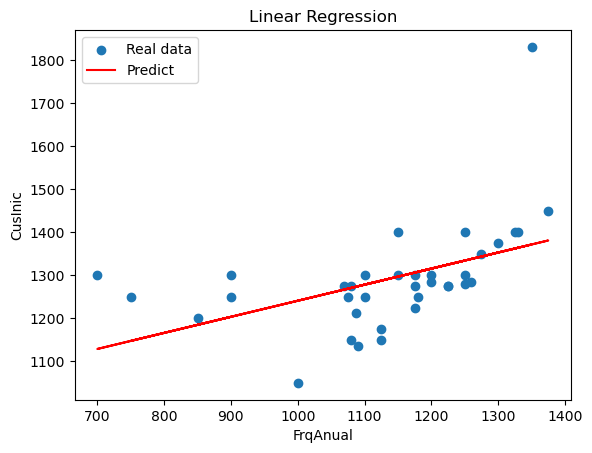

In [48]:
plt.scatter(x, y, label='Real data')
plt.plot(x, model.predict(data), color="red", label='Predict')
plt.xlabel('FrqAnual')
plt.ylabel('CusInic')
plt.title('Linear Regression')
plt.legend()
plt.show()